<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:navy;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:white; font-weight: bold; font-family: Times new Roman">
Credit Card Fraud Detection</h1></center>    

</div>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

**LINK FOR DOWNLOADING THE CSV**
https://drive.google.com/file/d/1cjpcKHxXDAcP4IDmxB7Wo0BLJdM7HecU/view?usp=sharing

**ABOUT THE DATASET**

The creditcard.csv dataset is a well-known dataset for credit card fraud detection. It is often used in machine learning and data analysis projects. Here is a detailed description of the dataset and its columns:

**Overview**
The creditcard.csv dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred over two days, with 492 frauds out of 284,807 transactions. The dataset is highly imbalanced, with the positive class (frauds) accounting for 0.172% of all transactions.

**Columns Description**
The dataset has 31 columns, each representing a different feature of the transactions. Here are the details:
    
* `Time`: The elapsed time in seconds between this transaction and the first transaction in the dataset. Type: Numerical
    
* `V1, V2, ..., V28`: These are the principal components obtained using PCA (Principal Component Analysis). Due to confidentiality issues, the original features are not provided, and these are the transformed features.Type: Numerical

* `Amount`: The transaction amount. This feature can be used for example-dependent cost-sensitive learning. Type: Numerical

* `Class`: The response variable and it takes value 1 in case of fraud and 0 otherwise. Type: Categorical (Binary)

In [87]:
#loading the dataset to pandas dataframe
df=pd.read_csv("creditcard.csv")

In [88]:
#printing first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [89]:
#printing the last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [90]:
#getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [91]:
#checking for any null vales
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [92]:
#distribution of legit and fraud transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

here we can see that the dataset is unbalanced since 1 is very less compared to 0
1=fraud
0=legit

In [93]:
#seperating the data for analysis
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [94]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [95]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [96]:
#comparision between both the legt and fraud transactions
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


dealing with the unbalanced data by undersampling
building a sample dataset conating similar distribution of the legit dataset


In [97]:
#we are taking a sample from the legit dataset
legit_sample=legit.sample(n=492)

In [98]:
legit_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152496,97391.0,2.116516,-0.838846,-0.519485,-0.520940,-0.978302,-0.330614,-1.390789,-0.060496,1.711727,...,0.006683,0.297890,0.146876,-0.805919,-0.387122,-0.236499,0.022564,-0.015657,39.00,0
81078,58776.0,0.655389,-1.256324,0.681849,0.965238,-1.320655,-0.037026,-0.228243,-0.079930,-0.815776,...,-0.137432,-0.375922,-0.182440,0.401517,0.254515,-0.361349,0.038135,0.088495,306.95,0
42079,40949.0,1.464124,-1.126740,0.506599,-1.196970,-1.488516,-0.482203,-0.981998,-0.166127,-1.503521,...,-0.448594,-0.778460,0.035205,0.012255,0.388398,-0.313870,0.045106,0.025020,39.33,0
160475,113404.0,2.006785,-0.118138,-2.161664,0.259910,0.373966,-1.683429,0.845163,-0.594527,0.041195,...,0.152710,0.376353,-0.082211,-0.039649,0.280091,0.799157,-0.146522,-0.075766,74.95,0
143942,85743.0,1.417747,-1.332505,-1.695960,-2.450069,1.250335,2.980132,-0.926292,0.591098,-2.333589,...,-0.501112,-1.469933,0.033026,0.947846,0.465743,-0.444474,-0.012332,0.025434,109.48,0


In [99]:
#concatening the sample and fraud dataset
df1=pd.concat([legit_sample,fraud],axis=0)#now dataset will be joined row wise and if axis=1 then column wise
df1.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [100]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [101]:
df1["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [102]:
df1.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,99513.865854,0.047849,-0.031644,0.011116,-0.101473,0.019368,0.023921,0.007169,-0.034638,0.025137,...,0.021438,0.012497,-0.005781,-0.018320,0.043052,0.007622,-0.027674,0.003269,-0.008245,94.477317
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [103]:
X=df1.drop(columns="Class",axis=1)
y=df1["Class"]

In [104]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
152496,97391.0,2.116516,-0.838846,-0.519485,-0.520940,-0.978302,-0.330614,-1.390789,-0.060496,1.711727,...,0.054213,0.006683,0.297890,0.146876,-0.805919,-0.387122,-0.236499,0.022564,-0.015657,39.00
81078,58776.0,0.655389,-1.256324,0.681849,0.965238,-1.320655,-0.037026,-0.228243,-0.079930,-0.815776,...,0.083840,-0.137432,-0.375922,-0.182440,0.401517,0.254515,-0.361349,0.038135,0.088495,306.95
42079,40949.0,1.464124,-1.126740,0.506599,-1.196970,-1.488516,-0.482203,-0.981998,-0.166127,-1.503521,...,-0.246776,-0.448594,-0.778460,0.035205,0.012255,0.388398,-0.313870,0.045106,0.025020,39.33
160475,113404.0,2.006785,-0.118138,-2.161664,0.259910,0.373966,-1.683429,0.845163,-0.594527,0.041195,...,-0.107682,0.152710,0.376353,-0.082211,-0.039649,0.280091,0.799157,-0.146522,-0.075766,74.95
143942,85743.0,1.417747,-1.332505,-1.695960,-2.450069,1.250335,2.980132,-0.926292,0.591098,-2.333589,...,-0.020741,-0.501112,-1.469933,0.033026,0.947846,0.465743,-0.444474,-0.012332,0.025434,109.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [105]:
y

152496    0
81078     0
42079     0
160475    0
143942    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [106]:
#splitting the dataset for training(70%) and testing(30% in testing)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)
#stratify is used to even amounts of fault and legit transaction rows in testing and training

In [107]:
#model training
model=LogisticRegression()

In [108]:
#training the logistic regression model 
model.fit(X_train,y_train)

LogisticRegression()

In [109]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)
training_data_accuracy

0.9326556543837357

In [110]:
#accuracy on testing data
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,y_test)
testing_data_accuracy

0.9137055837563451

<Axes: >

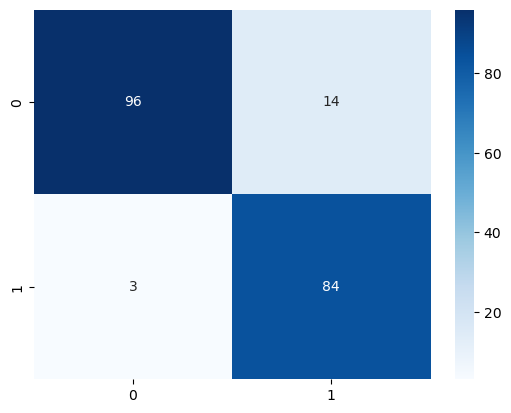

In [111]:
#generating the confusion matrix 
cm1=confusion_matrix(X_test_prediction,y_test)
sns.heatmap(cm1,annot=True,cmap="Blues")

In [112]:
#by naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [113]:
#accuracy on training data by naive bayes
X_train_prediction1=gnb.predict(X_train)
training_data_accuracy1=accuracy_score(X_train_prediction1,y_train)
training_data_accuracy1

0.8576874205844981

In [114]:
#accuracy on testing data
X_test_prediction1=gnb.predict(X_test)
testing_data_accuracy1=accuracy_score(X_test_prediction1,y_test)
testing_data_accuracy1

0.868020304568528

<Axes: >

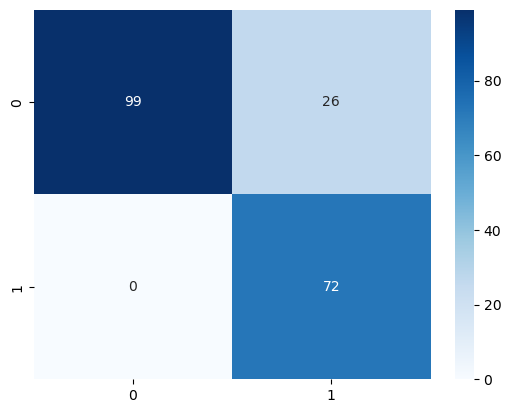

In [115]:
#generating the confusion matrix
cm=confusion_matrix(X_test_prediction1,y_test)
sns.heatmap(cm,annot=True,cmap="Blues")